### On peut trouver le froude critique pour différente valeur de w

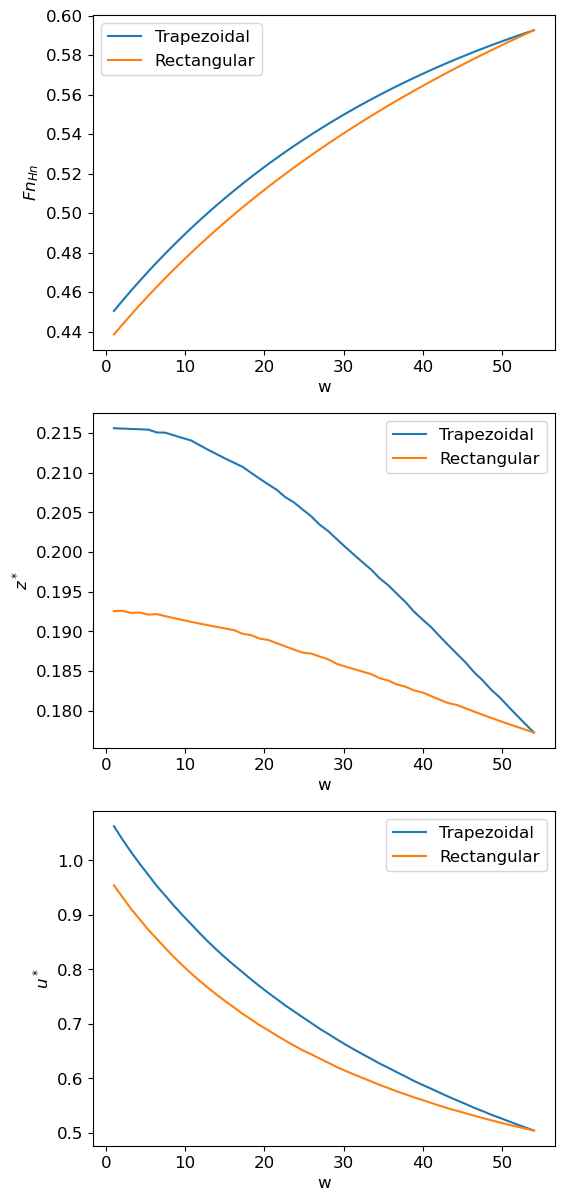

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import json
from config import large_figure_width, large_figure_height, standard_figure_width, standard_figure_height

canal = canal = 'Canal trapézoïdal'
W = 54
w = 36
T = 2.5
B = 11.4
h = 4.5

w_values = np.linspace(1, 54)

zct_peaks = []
zc_peaks = []
Fct_peaks = []
Fc_peaks = []
uct_peaks = []
uc_peaks = []
p_values = []
m_values = []

for w in w_values:
    Ac = (W+w)*h/2
    Ab = B*T
    Hm = Ac/W


    p = (W-w)/2/h
    
    p_values +=  [p]
    
    m = Ab/Ac
    m_values += [m]

    z = np.linspace(0, 0.8, 1000)

    z = z/Hm


    Fc = np.sqrt( ( 2*z*(1-z-m)**2 )/( 1-(1-z-m)**2 ) ) # constantine


    Fct = np.sqrt( ( 2*z*(1-z-m+p*Hm/W*z**2)**2 )/( 1-(1-z-m+p*Hm/W*z**2)**2 ) ) # constantine trapeze


    peaks_indices_c, _ = find_peaks(Fc)
    peaks_indices_ct, _ = find_peaks(Fct)

    zc_peaks += [z[peaks_indices_c]]
    Fc_peaks += [Fc[peaks_indices_c]]
    uc_peaks += [z[peaks_indices_c]/Fct[peaks_indices_c]**2 ]
    
    
    zct_peaks += [z[peaks_indices_ct]]
    Fct_peaks += [Fct[peaks_indices_ct]]
    uct_peaks += [z[peaks_indices_ct]/Fct[peaks_indices_ct]**2  ] 


fig_size = (large_figure_width, 3*large_figure_height)
plt.figure(figsize=fig_size)

# Plot Froude numbers
plt.subplot(3, 1, 1)
plt.plot(w_values, Fct_peaks, label='Trapezoidal')
plt.plot(w_values, Fc_peaks, label='Rectangular')
plt.legend()
plt.xlabel('w')
plt.ylabel(r'$Fn_{Hn}$')

# Plot z* values
plt.subplot(3, 1, 2)
plt.plot(w_values, zct_peaks, label='Trapezoidal')
plt.plot(w_values, zc_peaks, label='Rectangular')
plt.legend()
plt.xlabel('w')
plt.ylabel(r'$z^*$')

# Plot u* values
plt.subplot(3, 1, 3)
plt.plot(w_values, uct_peaks, label='Trapezoidal')
plt.plot(w_values, uc_peaks, label='Rectangular')  # Corrected variable name
plt.legend()
plt.xlabel('w')
plt.ylabel(r'$u^*$')

plt.tight_layout()
plt.show()
   

### Si on trace en fonction de p


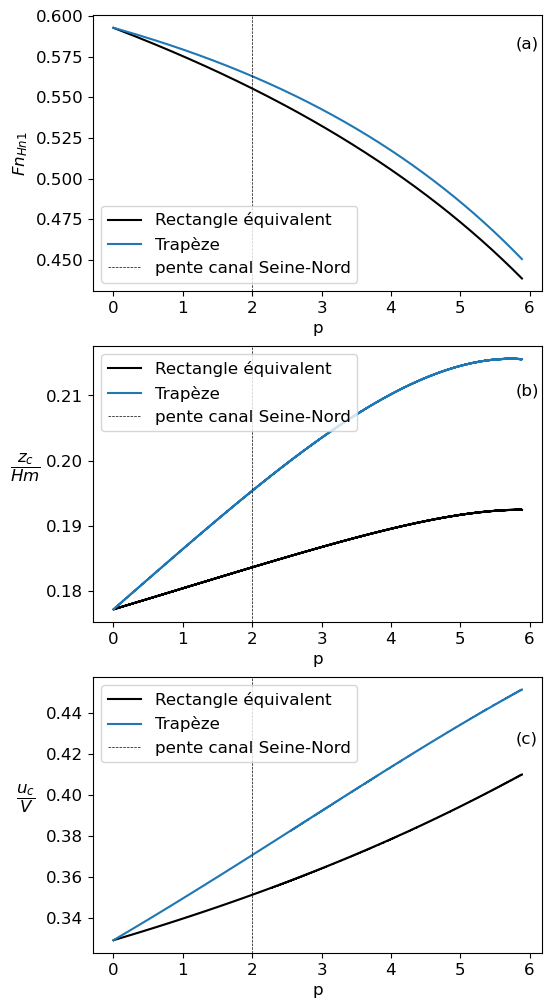

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import json
from config import large_figure_width, large_figure_height, standard_figure_width, standard_figure_height

canal = canal = 'Canal trapézoïdal'
W = 54.
w = 36
T = 2.5
B = 11.4
h = 4.5


g = 9.81 


w_values = np.linspace(1, W, 10000)

zct_peaks = []
zc_peaks = []
Fct_peaks = []
Fc_peaks = []
uct_peaks = []
uc_peaks = []
p_values = []
m_values = []

for w in w_values:
    Ac = (W+w)*h/2
    Ab = B*T
    Hm = Ac/W


    p = (W-w)/2/h
    
    p_values +=  [p]
    
    m = Ab/Ac
    m_values += [m]

    z = np.linspace(0, 0.8, 10000)

    z = z/Hm



    Fc = np.sqrt( ( 2*z*(1-z-m)**2 )/( 1-(1-z-m)**2 ) ) # constantine
    uc = -np.sqrt(Fc*g*h) + np.sqrt(Fc*g*h + 2 * g * z)

    Fct = np.sqrt( ( 2*z*(1-z-m+p*Hm/W*z**2)**2 )/( 1-(1-z-m+p*Hm/W*z**2)**2 ) ) # constantine trapeze
    uct = -np.sqrt(Fct*g*h) + np.sqrt(Fct*g*h + 2 * g * z)

    peaks_indices_c, _ = find_peaks(Fc)
    peaks_indices_ct, _ = find_peaks(Fct)
    # Obtenir les valeurs de z et F correspondant aux maxima locaux
    peaks_indices_c, _ = find_peaks(Fc)
    peaks_indices_ct, _ = find_peaks(Fct)

    zc_peaks.extend(z[peaks_indices_c])
    Fc_peaks.extend(Fc[peaks_indices_c])
    uc_peaks.extend(uc[peaks_indices_c])

    zct_peaks.extend(z[peaks_indices_ct])
    Fct_peaks.extend(Fct[peaks_indices_ct])
    uct_peaks.extend(uct[peaks_indices_ct])



fig_size = (large_figure_width, 3*large_figure_height)
plt.figure(figsize=fig_size)

# Plot Froude numbers
plt.subplot(3, 1, 1)
plt.plot(p_values, Fc_peaks, label='Rectangle équivalent', color = 'black')
plt.plot(p_values, Fct_peaks, label='Trapèze')
plt.axvline(x=2, color='k', linestyle='--', lw=0.5, label='pente canal Seine-Nord')
plt.legend()
plt.xlabel('p')
plt.ylabel(r'$Fn_{Hn1}$')
plt.text( x=5.8, y = 0.58, s = '(a)' )



# Tracé du deuxième graphique : valeurs de z*
plt.subplot(3, 1, 2)
plt.plot(p_values, zc_peaks, label='Rectangle équivalent', color = 'black')
plt.plot(p_values, zct_peaks, label='Trapèze')
plt.axvline(x=2, color='k', linestyle='--', lw=0.5, label='pente canal Seine-Nord')
plt.legend()
plt.xlabel('p')
plt.ylabel(r'$\dfrac{z_c}{Hm}$', rotation = 0, labelpad=15)
plt.text( x=5.8, y = 0.21, s = '(b)' )

# Tracé du troisième graphique : valeurs de u*
plt.subplot(3, 1, 3)
plt.plot(p_values, uc_peaks, label='Rectangle équivalent', color = 'black')
plt.plot(p_values, uct_peaks, label='Trapèze')
plt.axvline(x=2, color='k', linestyle='--', lw=0.5, label='pente canal Seine-Nord')
plt.legend()
plt.xlabel('p')
plt.ylabel(r'$\dfrac{u_c}{V}$', rotation = 0, labelpad=15)
plt.text( x=5.8, y = 0.425, s = '(c)' )

plt.savefig( '../figures/diff-rectangle-trapeze.pdf', bbox_inches = 'tight')

plt.show()

    

## Différence en fonction de la pente

10000
10000


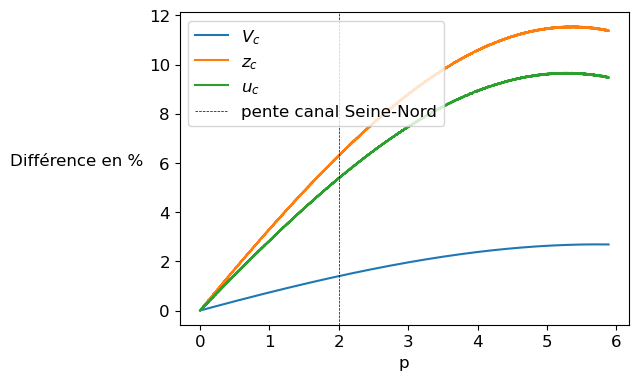

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import json
from config import large_figure_width, large_figure_height, standard_figure_width, standard_figure_height

canal =  'Canal trapézoïdal'
W = 54
w = 36
T = 3
B = 11.4
h = 4.5


g = 9.81 


w_values = np.linspace(1, W, 10000)

zct_peaks = []
zc_peaks = []
Fct_peaks = []
Fc_peaks = []
uct_peaks = []
uc_peaks = []
p_values = []
m_values = []

for w in w_values:
    Ac = (W+w)*h/2
    Ab = B*T
    Hm = Ac/W


    p = (W-w)/2/h
    
    p_values +=  [p]
    
    m = Ab/Ac
    m_values += [m]

    z = np.linspace(0, 1, 10000)

    z = z/Hm



    Fc = np.sqrt( ( 2*z*(1-z-m)**2 )/( 1-(1-z-m)**2 ) ) # constantine
    uc = -np.sqrt(Fc*g*h) + np.sqrt(Fc*g*h + 2 * g * z)

    Fct = np.sqrt( ( 2*z*(1-z-m+p*Hm/W*z**2)**2 )/( 1-(1-z-m+p*Hm/W*z**2)**2 ) ) # constantine trapeze
    uct = -np.sqrt(Fct*g*h) + np.sqrt(Fct*g*h + 2 * g * z)

    peaks_indices_c, _ = find_peaks(Fc)
    peaks_indices_ct, _ = find_peaks(Fct)
    # Obtenir les valeurs de z et F correspondant aux maxima locaux
    peaks_indices_c, _ = find_peaks(Fc)
    peaks_indices_ct, _ = find_peaks(Fct)

    zc_peaks.extend(z[peaks_indices_c])
    Fc_peaks.extend(Fc[peaks_indices_c])
    uc_peaks.extend(uc[peaks_indices_c])

    zct_peaks.extend(z[peaks_indices_ct])
    Fct_peaks.extend(Fct[peaks_indices_ct])
    uct_peaks.extend(uct[peaks_indices_ct])

Fc_peaks = np.array(Fc_peaks)
Fct_peaks = np.array(Fct_peaks)
zc_peaks = np.array(zc_peaks)
zct_peaks = np.array(zct_peaks)
uc_peaks = np.array(uc_peaks)
uct_peaks = np.array(uct_peaks)


fig_size = (large_figure_width, large_figure_height)
plt.figure(figsize=fig_size)

# Plot Froude numbers

print (len(p_values))
print (len((Fct_peaks-Fc_peaks)/Fc_peaks))


plt.plot(p_values, 100 *(Fct_peaks-Fc_peaks)/Fc_peaks, label = r'$V_c$')
plt.plot(p_values, 100*(zct_peaks-zc_peaks)/zc_peaks, label = r"$z_c$")
plt.plot(p_values, 100*(uct_peaks-uc_peaks)/uc_peaks, label = r'$u_c$')
plt.axvline(x=2, color='k', linestyle='--', lw=0.5, label='pente canal Seine-Nord')
plt.legend(loc = 2)
plt.xlabel('p')
plt.ylabel(r'Différence en % ', rotation =0, labelpad=50)



# plt.savefig( '../figures/diff-p.pdf', bbox_inches = 'tight')

plt.show()

    

/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_64927/2235546382.py:41: RuntimeWarning: invalid value encountered in sqrt
  F = np.sqrt((2 * Z * (1 - Z - m)**2) / (1 - (1 - Z - m)**2))  # constantine
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_64927/2235546382.py:44: RuntimeWarning: invalid value encountered in sqrt
  Ft = np.sqrt((2 * Z * (1 - Z - m + p * Hm / W * Z**2)**2) / (1 - (1 - Z - m + p * Hm / W * Z**2)**2))  # constantine trapeze
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_64927/2235546382.py:41: RuntimeWarning: divide by zero encountered in divide
  F = np.sqrt((2 * Z * (1 - Z - m)**2) / (1 - (1 - Z - m)**2))  # constantine
/var/folders/q9/zszppxr51xd4ncd2rhntll7cx7z7yt/T/ipykernel_64927/2235546382.py:44: RuntimeWarning: divide by zero encountered in divide
  Ft = np.sqrt((2 * Z * (1 - Z - m + p * Hm / W * Z**2)**2) / (1 - (1 - Z - m + p * Hm / W * Z**2)**2))  # constantine trapeze


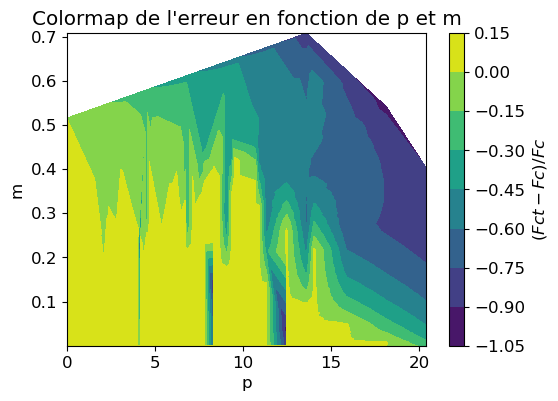

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from config import large_figure_width, large_figure_height

g = 9.81 

# Définir W et Hm
W = 54  # Exemple de valeur, à ajuster selon votre contexte
Hm = 1.0  # Exemple de valeur, à ajuster selon votre contexte

# Générer des valeurs pour w, B, T, et h
w_values = np.linspace(10, W, 10)  # Éviter w=0 pour éviter division par zéro
B_values = np.linspace(0.1, 10, 10)  # Éviter B=0 pour éviter division par zéro
T_values = np.linspace(0.1, 3, 10)  # Éviter T=0 pour éviter division par zéro
h_values = np.linspace(0.1, 4.5, 10)  # Éviter h=0 pour éviter division par zéro

# Listes pour stocker les résultats
p_values = []
m_values = []
Fc_values = []
Fct_values = []
zc_values = []
zct_values = []
uc_values = []
uct_values = []


# Boucles pour parcourir toutes les combinaisons de w, B, T, et h
for w in w_values:
    for B in B_values:
        for T in T_values:
            for h in h_values:
                Z = np.linspace(0, 1, 100)
                p = (W - w) / (2 * h)
                Ab = B * T
                Ac = h * (W + w) / 2
                m = Ab / Ac
                Hm = Ac/W
                Z = Z/Hm
                F = np.sqrt((2 * Z * (1 - Z - m)**2) / (1 - (1 - Z - m)**2))  # constantine
                u = -np.sqrt(Fc*g*h) + np.sqrt(Fc*g*h + 2 * g * Z)
                
                Ft = np.sqrt((2 * Z * (1 - Z - m + p * Hm / W * Z**2)**2) / (1 - (1 - Z - m + p * Hm / W * Z**2)**2))  # constantine trapeze
                ut = -np.sqrt(Fct*g*h) + np.sqrt(Fct*g*h + 2 * g * Z)
                
                max_index = np.argmax(F)
                Fc = F[max_index]
                zc = z[max_index]
                uc = u[max_index]

                max_index_ct = np.argmax(Ft)
                Fct = Ft[max_index_ct]
                zct = z[max_index_ct]
                uct = ut[max_index_ct]


                p_values.append(p)
                m_values.append(m)
                
                Fc_values.append(Fc)
                Fct_values.append(Fct)
                
                zc_values.append(zc)
                zct_values.append(zct)
                
                uc_values.append(uc)
                uct_values.append(uct)
                
                
# Convertir les listes en tableaux numpy
p_values = np.array(p_values)
m_values = np.array(m_values)
Fc_values = np.array(Fc_values)
Fct_values = np.array(Fct_values)
zc_values = np.array(zc_values)
zct_values = np.array(zct_values)
uc_values = np.array(uc_values)
uct_values = np.array(uct_values)




# Calculer la différence relative
delta_F = (Fct_values - Fc_values) / Fc_values
delta_z = (zct_values - zc_values) / zc_values
delta_u = (uct_values - uc_values) / uc_values


# Filtrer les valeurs non-finies
finite_mask = np.isfinite(delta_F)

# Création de la figure
fig_size = (large_figure_width, large_figure_height)
plt.figure(figsize=fig_size)

# Création de la colormap
plt.tricontourf(p_values[finite_mask], m_values[finite_mask], delta_F[finite_mask], cmap='viridis')
plt.colorbar(label=r'$(Fct - Fc) / Fc$')
plt.xlabel('p')
plt.ylabel('m')
plt.title('Colormap de l\'erreur en fonction de p et m')

plt.show()


### Si on trace en fonction de m 



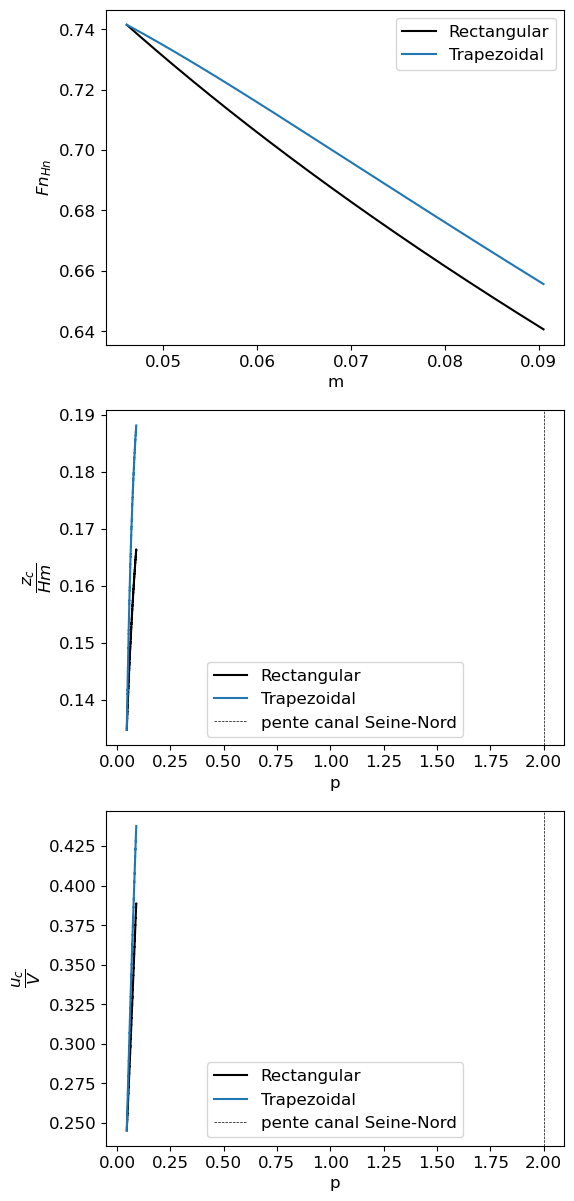

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import json
from config import large_figure_width, large_figure_height, standard_figure_width, standard_figure_height

canal = canal = 'Canal trapézoïdal'
W = 54
w = 36
T = 1
B = 11.2
h = 4.5

w_values = np.linspace(1, W, 10000)

zct_peaks = []
zc_peaks = []
Fct_peaks = []
Fc_peaks = []
uct_peaks = []
uc_peaks = []
p_values = []
m_values = []

for w in w_values:
    Ac = (W+w)*h/2
    Ab = B*T
    Hm = Ac/W


    p = (W-w)/2/h
    
    p_values +=  [p]
    
    m = Ab/Ac
    m_values += [m]

    z = np.linspace(0, 0.8, 10000)

    z = z/Hm



    Fc = np.sqrt( ( 2*z*(1-z-m)**2 )/( 1-(1-z-m)**2 ) ) # constantine


    Fct = np.sqrt( ( 2*z*(1-z-m+p*Hm/W*z**2)**2 )/( 1-(1-z-m+p*Hm/W*z**2)**2 ) ) # constantine trapeze


    peaks_indices_c, _ = find_peaks(Fc)
    peaks_indices_ct, _ = find_peaks(Fct)
    # Obtenir les valeurs de z et F correspondant aux maxima locaux
    zc_peaks += [z[peaks_indices_c]]
    Fc_peaks += [Fc[peaks_indices_c]]
    uc_peaks += [z[peaks_indices_c]/Fct[peaks_indices_c]**2 ]
    
    
    zct_peaks += [z[peaks_indices_ct]]
    Fct_peaks += [Fct[peaks_indices_ct]]
    uct_peaks += [z[peaks_indices_ct]/Fct[peaks_indices_ct]**2  ] 


fig_size = (large_figure_width, 3*large_figure_height)
plt.figure(figsize=fig_size)

# Plot Froude numbers
plt.subplot(3, 1, 1)
plt.plot(m_values, Fc_peaks, label='Rectangular', color = 'black')
plt.plot(m_values, Fct_peaks, label='Trapezoidal')
plt.legend()
plt.xlabel('m')
plt.ylabel(r'$Fn_{Hn}$')


# Tracé du deuxième graphique : valeurs de z*
plt.subplot(3, 1, 2)
plt.plot(m_values, zc_peaks, label='Rectangular', color = 'black')
plt.plot(m_values, zct_peaks, label='Trapezoidal')
plt.axvline(x=2, color='k', linestyle='--', lw=0.5, label='pente canal Seine-Nord')
plt.legend()
plt.xlabel('p')
plt.ylabel(r'$\dfrac{z_c}{Hm}$')

# Tracé du troisième graphique : valeurs de u*
plt.subplot(3, 1, 3)
plt.plot(m_values, uc_peaks, label='Rectangular', color = 'black')
plt.plot(m_values, uct_peaks, label='Trapezoidal')
plt.axvline(x=2, color='k', linestyle='--', lw=0.5, label='pente canal Seine-Nord')
plt.legend()
plt.xlabel('p')
plt.ylabel(r'$\dfrac{u_c}{V}$')


plt.tight_layout()
plt.show()

    